In [1]:
# Manipular de datos
import pandas as pd
import numpy as np

In [2]:
# Cargar datasets
df15 = pd.read_csv('data/bici15_cdn.csv')

In [3]:
df16 = pd.read_csv('data/bici16_cdn.csv')

In [4]:
df17 = pd.read_csv('data/bici17_cdn.csv')

In [5]:
df18 = pd.read_csv('data/bici18_cdn.csv')

In [6]:
df19 = pd.read_csv('data/bici19_cdn.csv')

In [7]:
# Las columnas son las mismas para todos
df18.columns

Index(['bici_id_usuario', 'bici_Fecha_hora_retiro', 'bici_tiempo_uso',
       'bici_nombre_estacion_origen', 'bici_estacion_origen',
       'bici_nombre_estacion_destino', 'bici_estacion_destino', 'bici_sexo',
       'bici_edad'],
      dtype='object')

In [8]:
# Graficar
import matplotlib.pyplot as plt
import seaborn as sns

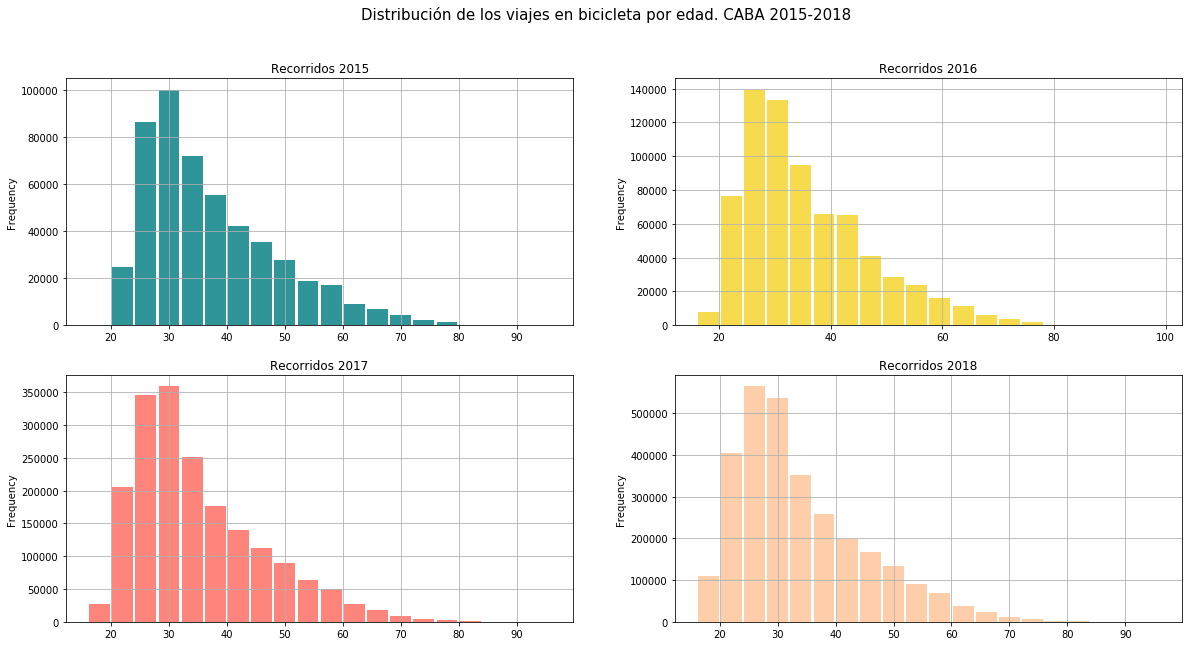

In [9]:
# Graficamos un histograma por año para ver cantidad de casos por edad
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
viajes15 = df15.bici_edad
viajes15.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#2F9599')
plt.title('Recorridos 2015')

plt.subplot(2,2,2)
viajes16 = df16.bici_edad
viajes16.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#F7DB4F')
plt.title('Recorridos 2016')

plt.subplot(2,2,3)
viajes17 = df17.bici_edad
viajes17.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#FF847C')
plt.title('Recorridos 2017')

plt.subplot(2,2,4)
viajes18 = df18.bici_edad
viajes18.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#FECEAB')
plt.title('Recorridos 2018')

plt.suptitle('Distribución de los viajes en bicicleta por edad. CABA 2015-2018', fontsize=15);

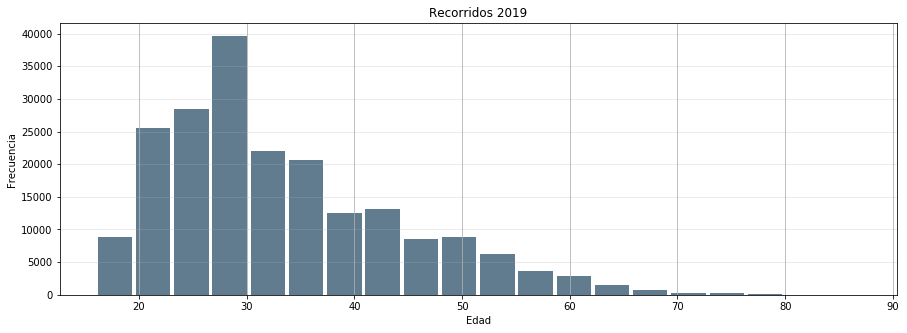

In [10]:
# Los grafico aparte porque no cubren todo el año
viajes19 = df19.bici_edad
viajes19.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e', figsize=(15,5))
plt.title('Recorridos 2019')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.3);

IDEA 1: Quiénes son los usuarios más frecuentes del servicio de bicicletas? Los jóvenes entre 25 y 35 años (distribución con sesgo a la derecha)

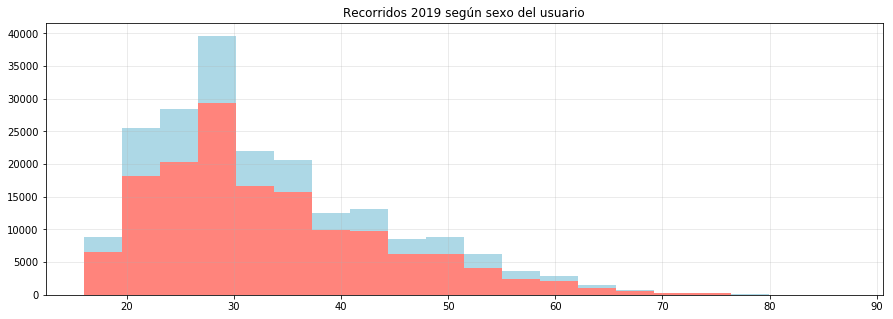

In [11]:
# Diferencias de uso por genero (2019)
edad = df19.bici_edad
sexo = df19.bici_sexo

plt.figure(figsize=(15,5))
plt.hist([[e for e, s in zip(edad, sexo) if s=='MASCULINO'], 
          [e for e, s in zip(edad, sexo) if s=='FEMENINO']], 
          color=['#FF847C','#ADD8E6'], bins=20, stacked=True)
plt.grid(alpha=0.3)
plt.title('Recorridos 2019 según sexo del usuario')
plt.show();

In [12]:
# Cantidad de hombres y mujeres por sexo (de aca saco la data para los graficos de torta)
df18.groupby(['bici_sexo'])['bici_edad'].count()

bici_sexo
FEMENINO         807495
MASCULINO       2162906
NO INFORMADO         78
Name: bici_edad, dtype: int64

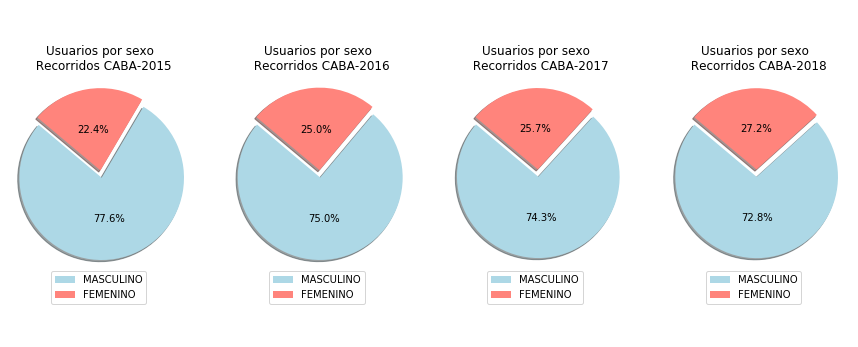

In [13]:
# Usuarios por sexo
# Plot 1
labels = ['MASCULINO', 'FEMENINO']
sizes = [391221, 112646]
colors = ['#ADD8E6', '#FF847C']
explode = (0.09, 0)  

# Plot 2
sizes2 = [537252, 178962]

# Plot 3
sizes3 = [1402028, 484136]
explode3 = (0.09, 0)  

# Plot 4
sizes4 = [2162906, 807495]
 
# Grilla de plots
plt.figure(figsize=(15,6))

plt.subplot(1,4,1)
plt.pie(sizes, explode=explode, labels=None, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, pctdistance = 0.5)
 
plt.legend(labels, loc=(0.22,0.1))
plt.axis('equal')
plt.title('Usuarios por sexo \n Recorridos CABA-2015', y=0.8)

plt.subplot(1,4,2)
plt.pie(sizes2, explode=explode, labels=None, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, pctdistance = 0.5)
plt.legend(labels, loc=(0.22,0.1))
plt.title('Usuarios por sexo \n Recorridos CABA-2016', y=0.8)
plt.axis('equal')

plt.subplot(1,4,3)
plt.pie(sizes3, explode=explode, labels=None, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, pctdistance = 0.5)
plt.legend(labels, loc=(0.22,0.1))
plt.title('Usuarios por sexo \n Recorridos CABA-2017', y=0.8)
plt.axis('equal')

plt.subplot(1,4,4)
plt.pie(sizes4, explode=explode, labels=None, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, pctdistance = 0.5)
plt.legend(labels, loc=(0.22,0.1))
plt.title('Usuarios por sexo \n Recorridos CABA-2018', y=0.8)
plt.axis('equal')
plt.show();

Los resultados por sexo indican que la mayoría de los usuarios son varones. Un resultado similar encontré en este artículo:
https://medium.com/@maglionejm_15007/entendiendo-con-un-poco-m%C3%A1s-de-profundidad-el-sistema-de-movilidad-sustentable-de-la-ciudad-de-f157ea3eb345

In [14]:
from datetime import datetime

In [15]:
# Función para devolver columna de fecha y hora
def fecha_hora(df):
    '''
    Separa la indormacion de fecha y hora que en todos los df estan juntas como string
    
    Argumentos
    ----------
    
    df: el dataframe de cada año de recorridos de bicis
    '''
    
    # Se splitea la columna en dos: fecha y hora que en todos los df estan juntas como str
    fecha_hora = df['bici_Fecha_hora_retiro'].str.split(' ', expand=True)
    
    # Se almacena en un nuevo df
    fecha_hora.columns = ['Fecha','Hora']
    
    return fecha_hora

In [16]:
# Función para devolver dia de la semana
def obtener_dia_semana(fecha):
    '''
    Devuelve el dia de la semana a partir de la fecha
    
    Argumentos
    ----------
    
    fecha: columna del df, para usarla hay que mapearla porque strptime no toma series 
    '''
    return datetime.strptime(fecha,'%Y-%m-%d').weekday()

In [17]:
# Cómo utilizar ambas funciones en cualquiera de los dataframes

# 1) se almacenan las columnas de fecha y hora 
tiempo19 = fecha_hora(df19)

# 2) a partie de la Fecha se obtiene el dia de la semana mapeando la última función
dia19 = tiempo19.Fecha.map(obtener_dia_semana)

In [18]:
# Creo una copia por las dudas
df19b = df19.copy()

In [19]:
# Reemplaza numero de dia por nombre. Se le pasa cualquier de los dataframes
def nombre_dia(df):
    dia = df.replace({0:'lunes', 1:'martes', 2:'miercoles', 3:'jueves', 4:'viernes', 5:'sabado', 6:'domingo'})
    return dia

In [20]:
# Dias de la semana
df19b['dia_semana'] = nombre_dia(dia19)

In [21]:
# Hora del dia
df19b['hora_dia'] = tiempo19.Hora

In [ ]:
sns.lineplot(x="hora_dia", y="cantidad", hue='bici_sexo', data=hora_sexo)

In [ ]:
df19

In [66]:
# Funcion para clasificar el momento del dia. Se pueden cambiar los horarios si resulta arbitrario
def momento_dia(x):
    
    if (x['hora_dia']>= '07:00:00') & (x['hora_dia']<= '11:30:00'):
        return '1.Mañana'
    
    if (x['hora_dia']>='11:30:00') & (x['hora_dia'] <= '14:30:00'):
        return '2.Mediodia'
    
    if (x['hora_dia']>'14:30:00') & (x['hora_dia'] < '17:00:00'):
        return '3.Media tarde'
    
    if (x['hora_dia']>='17:00:00') & (x['hora_dia'] <= '19:00:00'):
        return '4.Tarde'
    
    if (x['hora_dia']>'19:00:00') & (x['hora_dia'] <= '21:00:00'):
        return '5.Tarde noche'
    
    if (x['hora_dia']>'21:00:00') & (x['hora_dia'] <= '24:00:00'):
        return '6.Noche'
    
    if (x['hora_dia']>'24:00:00') & (x['hora_dia'] < '07:00:00'):
        return '7.Madrugada'

In [67]:
momento_dia = df19b.apply(lambda x: momento_dia(x),1)

In [68]:
df19b['momento_dia'] = momento_dia

In [69]:
# Aca se podria ver si al patron cambia filtrando para fines o dias de semana
sexo_dia = df19b.groupby(['momento_dia','bici_sexo'])[['bici_sexo']].count()

In [70]:
sexo_dia.columns = ['Cantidad']

In [71]:
sexo_dia = sexo_dia.reset_index()

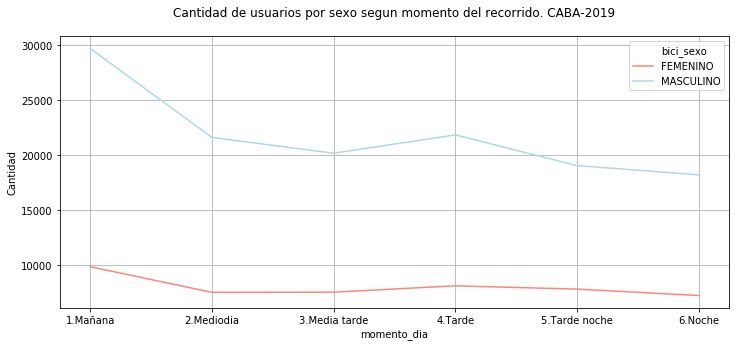

In [99]:
plt.figure(figsize=(12,5))
ax = sns.lineplot(x="momento_dia", y="Cantidad", hue='bici_sexo', data=sexo_dia.loc[sexo_dia['bici_sexo']!='NO INFORMADO'], palette = ['#FF847C','#ADD8E6'])
ax.set_facecolor("white")
plt.title('Cantidad de usuarios por sexo segun momento del recorrido. CABA-2019', y=1.05)
plt.grid()

In [103]:
# Total de estaciones de origen
len(df19b.bici_nombre_estacion_origen.unique())

170

In [105]:
# Total de estaciones de destino
len(df19b.bici_nombre_estacion_destino.unique())

171

In [124]:
# Geolocalizacion
import geopandas as gpd
import mplleaflet

In [108]:
# Shape de estaciones descargados de DataBA
estaciones = gpd.read_file('data/estaciones_de_bicicletas.shp')

In [113]:
estaciones.NOMBRE.unique()

array(['Facultad de Derecho', 'Retiro', 'Aduana', 'Plaza Roma',
       'Parque Lezama', 'Plaza Italia', 'Obelisco', 'Congreso',
       'Parque Las Heras', 'Puerto Madero - UCA', 'Tribunales',
       'Plaza Vicente López', 'Once', 'Pacífico', 'Plaza Houssay',
       'Legislatura (ex Plaza de Mayo)', 'Plaza Almagro', 'Independencia',
       'Plaza San Martín', 'Distrito Audiovisual', 'Arenales', 'Suipacha',
       'Alsina', 'Plaza Guemes', 'Juana Manso', 'Montevideo',
       'Plaza Boedo', 'Parque Centenario', 'Parque Patricios', 'Peña',
       'Catedral', 'Ingeniero Butty', 'Maipú', 'Piedras',
       'Plaza Libertad', 'Urquiza', 'Facultad de Medicina',
       'Galerías Pacífico', 'Sarmiento', 'Zoológico', 'Tucumán', 'Chile',
       'Córdoba', 'Ricardo Rojas', 'Diagonal Norte', '25 de Mayo',
       'Rivarola', 'Belgrano', 'Sánchez de Bustamante',
       'Hospital Italiano', 'Coronel Díaz', 'Julián Álvarez', 'Perón',
       'Ministro Carranza', 'Plaza Palermo Viejo', 'Ayacucho', 'Riobamba

In [116]:
# Groupby por origen y destino
origen = df19.groupby(['bici_nombre_estacion_origen'])[['bici_sexo']].count().reset_index()
destino = df19.groupby(['bici_nombre_estacion_destino'])[['bici_sexo']].count().reset_index()

In [122]:
# Usamos origen y destino para mergear con el shape de puntos
origen_map = pd.merge(estaciones,origen, left_on='NOMBRE', right_on='bici_nombre_estacion_origen')
destino_map = pd.merge(estaciones,destino, left_on='NOMBRE', right_on='bici_nombre_estacion_destino')

In [144]:
# ORIGEN
fig, ax = plt.subplots(1, figsize = (8,8))
ax.set_axis_off()
origen_map.plot(ax=ax,marker='o', color='#FF847C', markersize=origen_map['bici_sexo']/20)

mplleaflet.display(fig=ax.figure, crs=origen_map.crs)

In [141]:
# DESTINO
fig, ax = plt.subplots(1, figsize = (8,8))
ax.set_axis_off()
destino_map.plot(ax=ax,marker='o', color='#2F9599', markersize=destino_map['bici_sexo']/20 )
mplleaflet.display(fig=ax.figure, crs=destino_map.crs)

In [147]:
# radios censales caba
caba = gpd.read_file('data/informacion_censal_por_radio_2010.shp')

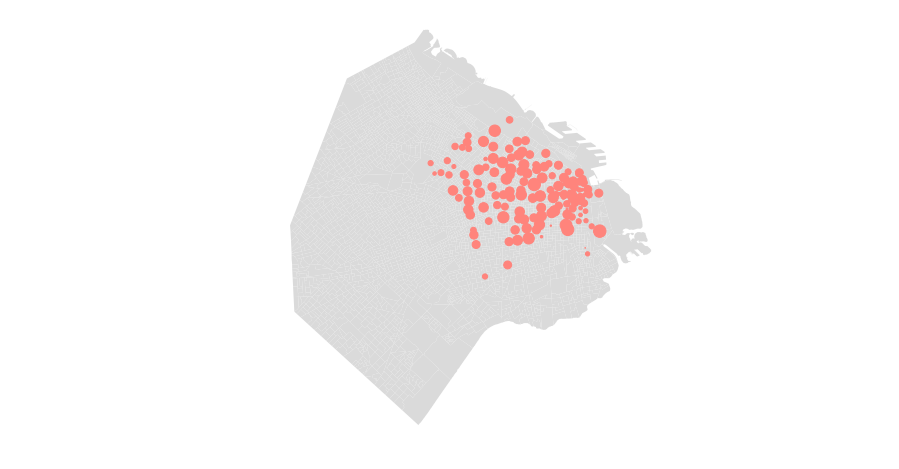

In [152]:
f, ax = plt.subplots(1,figsize=(15,8))
caba.to_crs(crs=origen_map.crs).plot(ax=ax, color='#dadada')
origen_map.plot(ax=ax,marker='o', color='#FF847C', markersize=origen_map['bici_sexo']/20 )
plt.axis('equal')
ax.set_axis_off()

In [153]:
#!pip3 install plotly_express